In [3]:
import numpy as np 
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.neighbors import KNeighborsClassifier 


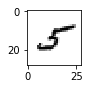

In [10]:
digit = plt.imread('./exercise/data/5/5_10.bmp')
plt.figure(figsize=(1,1))
plt.imshow(digit,cmap ='gray')

In [13]:
data = [] #存储图片的。
target = [] #存储目标值
#先读取文件夹
for i in range(10):
    for j in range(1,501):
        digit = plt.imread('./exercise/data/%d/%d_%d.bmp.'%(i,i,j))
        data.append(digit)
        target.append(i)
        
#data 有5000个数据
#target 是9个文件。 每个文件夹有500张图片。图片数字的分类
# i 太多个文件夹
#j 代表每个文件夹有多少张图片

In [21]:
# 机器学习是二维数组
X = np.array(data)
Y = np.array(target)
# display(X,Y) #x是3维数组， y是一维数组
# X.shape#(5000, 28, 28)
X = X.reshape(5000,-1) #-1  就是任意的
X.shape

(5000, 784)

In [23]:
from sklearn.model_selection import train_test_split

In [29]:
#他会自动打乱，顺序，这个的目的。不知道是啥
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.1)
X_train.shape

(4500, 784)

In [31]:
Y_train.shape

(4500,)

In [51]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train,Y_train)
#预测
knn.predict(X_test)
knn.score(X_test,Y_test)

0.94999999999999996

In [44]:
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train,Y_train)
#预测
y_ = knn.predict(X_test)
# y_ == Y_test
# y_ #预测出来的数据
# Y_test #正式数据
(y_ == Y_test).mean()

#五一收假完

0.94999999999999996

In [48]:
from sklearn.externals import joblib
joblib.dump(knn,'./digit_recognize.m')

['./digit_recognize.m']

In [52]:
digit_detector = joblib.load('./digit_recognize.m')
digit_detector

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=3, p=2,
           weights='uniform')

In [55]:
#我用现在的算法 预测 x_test[0-100]准确路会是100%吗？
y_ = digit_detector.predict(X_test[:100])
y_

array([8, 4, 9, 1, 0, 9, 6, 1, 7, 7, 6, 4, 7, 1, 2, 6, 1, 6, 8, 3, 2, 8, 2,
       9, 1, 8, 8, 8, 6, 4, 5, 8, 8, 2, 3, 6, 4, 3, 7, 0, 5, 9, 3, 3, 2, 0,
       8, 5, 7, 8, 4, 5, 2, 4, 9, 9, 2, 8, 8, 0, 8, 5, 0, 3, 6, 6, 5, 1, 2,
       9, 5, 3, 1, 6, 0, 2, 6, 6, 1, 9, 8, 0, 9, 4, 8, 8, 7, 0, 1, 1, 0, 4,
       0, 9, 5, 1, 1, 0, 0, 7])

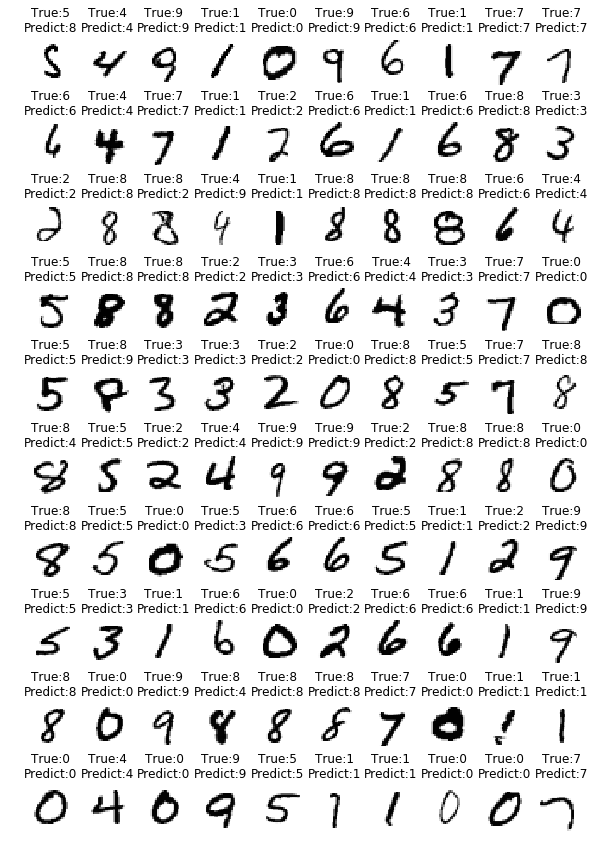

In [57]:
plt.figure(figsize=(1*10,1.5*10))
for i in range(100):
    #画一个10行10列图像
    axes = plt.subplot(10,10,i+1)
    axes.imshow(X_test[i].reshape(28,28),cmap='gray')
    X_test[i].shape
    t=Y_test[i]#真实数据
    #预测的数据
    p =y_[i]
    axes.set_title('True:%d\nPredict:%d'%(t,p))
    axes.axis('off')